### **Load Important libraries**

In [94]:
import os
import tarfile
import urllib

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator,MetaEstimatorMixin
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


### **Read Data**

In [95]:
#first find the rootbase of data url
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
#Create two folder and join them
HOUSIN_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [96]:
def fetch_data(housing_url=HOUSING_URL,housing_path=HOUSIN_PATH):
    os.makedirs(HOUSIN_PATH)
    tgz_path = os.path.join(housing_url,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=tgz_path)
    housing_tgz.close()


In [97]:
def load_data (housing_url = HOUSIN_PATH):
    housing_csv = os.path.join(HOUSIN_PATH,"housing.csv")
    return pd.read_csv(housing_csv)

In [98]:
df = load_data()

In [99]:
df.head()

,Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Market.Value.per.SqFt,Boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan


In [100]:
features = df.drop('Market.Value.per.SqFt',axis=1)
housing_labels = df['Full.Market.Value']

In [101]:
df['Full.Market.Value'].mean()

12977807.587966489

### **Data Exploration**

In [102]:
#find out categorical data and numerical  columns
numerical_cols = features.select_dtypes(include=["int64","float64"]).columns
categorical_cols = features.select_dtypes(include=["object","bool"]).columns

In [103]:
print(numerical_cols)
print("-------------------------------------categorical_cols--------------\n")
print(categorical_cols)

Index(['Total.Units', 'Year.Built', 'Gross.SqFt', 'Estimated.Gross.Income',
       'Gross.Income.per.SqFt', 'Estimated.Expense', 'Expense.per.SqFt',
       'Net.Operating.Income', 'Full.Market.Value'],
      dtype='object')
-------------------------------------categorical_cols--------------

Index(['Neighborhood', 'Building.Classification', 'Boro'], dtype='object')


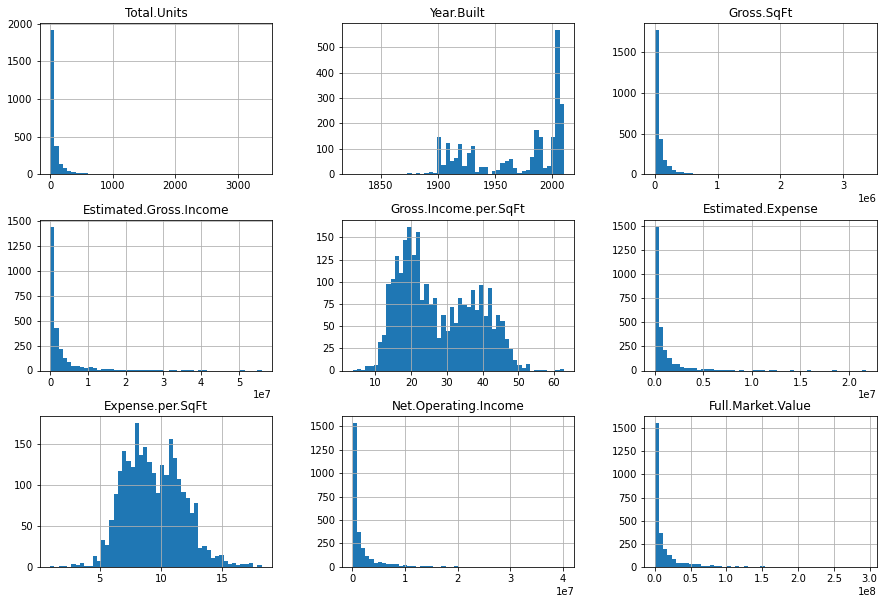

In [104]:
features.hist(bins=50, figsize=(15,10))
plt.show()

In [105]:
#check missing data
features.isnull().sum()

Neighborhood                0
Building.Classification     0
Total.Units                 0
Year.Built                 96
Gross.SqFt                  0
Estimated.Gross.Income      0
Gross.Income.per.SqFt       0
Estimated.Expense           0
Expense.per.SqFt            0
Net.Operating.Income        0
Full.Market.Value           0
Boro                        0
dtype: int64

## **Data Cleaning**

In [106]:
# Replace missing data with zero for year build
features['Year.Built'].fillna(0,inplace = True)

In [107]:
features.isnull().sum()

Neighborhood               0
Building.Classification    0
Total.Units                0
Year.Built                 0
Gross.SqFt                 0
Estimated.Gross.Income     0
Gross.Income.per.SqFt      0
Estimated.Expense          0
Expense.per.SqFt           0
Net.Operating.Income       0
Full.Market.Value          0
Boro                       0
dtype: int64

In [108]:
features.head()

,Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,0.0,554174,17310000,31.24,3543000,6.39,13767000,90970000,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,Manhattan


In [109]:
housing_num = features.drop(columns=categorical_cols, axis=1)
housing_num.head()

,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value
0,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000
1,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000
2,500,0.0,554174,17310000,31.24,3543000,6.39,13767000,90970000
3,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006
4,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996


In [110]:
housing_prepared = pd.get_dummies(features)
housing_prepared.head()

,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Neighborhood_ALPHABET CITY,...,Neighborhood_WYCKOFF HEIGHTS,Building.Classification_R2-CONDOMINIUM,Building.Classification_R4-CONDOMINIUM,Building.Classification_R9-CONDOMINIUM,Building.Classification_RR-CONDOMINIUM,Boro_Bronx,Boro_Brooklyn,Boro_Manhattan,Boro_Queens,Boro_Staten Island
0,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,0,...,0,0,0,1,0,0,0,1,0,0
1,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,0,...,0,0,1,0,0,0,0,1,0,0
2,500,0.0,554174,17310000,31.24,3543000,6.39,13767000,90970000,0,...,0,0,0,0,1,0,0,1,0,0
3,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,0,...,0,0,1,0,0,0,0,1,0,0
4,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,0,...,0,0,1,0,0,0,0,1,0,0


In [111]:
#we can add here more steps for pipline
# numerical_pip = Pipeline([("StdScaller",StandardScaler())])
std_scaller = StandardScaler()
housing_tr = std_scaller.fit_transform(housing_prepared)

In [112]:
# housing_numeric_tr = numerical_pip.fit_transform(housing_num)

In [113]:
#apply full pipline for both numeric and categorical columns
# numeric_attr = list(housing_num)
# categorical_attr = ['Neighborhood'	,'Building.Classification'	,'Boro']
# full_pipeline = ColumnTransformer([("num",numerical_pip,numeric_attr),
#                    ("cat",OneHotEncoder(),categorical_attr),
#                    ])

In [114]:
# housing_prepare = full_pipeline.fit_transform(df)

In [115]:
# full_pipeline

### **Select and train a model**

In [116]:
linear_reg = LinearRegression()
linear_reg.fit(housing_tr,housing_labels)

LinearRegression()

In [117]:
#build tree regression model 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_tr,housing_labels)

DecisionTreeRegressor()

In [118]:
# some_data = features.iloc[:5]
# some_labels = housing_lable.iloc[:5]
# some_data_prepared = full_pipeline.transform(some_data)
# print("Predictions:", linear_reg.predict(some_data_prepared))

#### **Cross Validation**

In [119]:
# test linear regression
scores= cross_val_score(linear_reg,housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)

In [120]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [121]:
display_scores(lin_reg_rmse_scores)

Scores: [1.17786218e-08 1.36704319e-08 4.29799824e-08 2.36837265e-08
 1.77402534e-08 1.67230765e-08 1.52479250e-08 8.92252872e-09
 1.23716283e-08 2.15444485e-08]
Mean: 1.8466262304631736e-08
Standard deviation: 9.205949464798145e-09


In [122]:
#test tree regression
scores= cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [123]:
display_scores(tree_rmse_scores)

Scores: [ 769002.85079719  599341.62699773 4559102.26415787 3045989.90661497
 6676462.00300111   51820.16611588   35163.48884819   12921.59584831
   80115.38330214  149756.44748222]
Mean: 1597967.5733165622
Standard deviation: 2238015.1741409


In [124]:
#ensure from the result
round(df['Full.Market.Value'].mean(),3)

12977807.588

In [125]:
#build RandomForestRregressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [126]:
scores= cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [127]:
display_scores(forest_rmse_scores)

Scores: [ 782192.67913187  259685.2128991  4700460.95079504 1946932.4781299
 5741486.33651228   54614.20941703   24855.53206075   11960.53815807
   27395.97792463   68936.53816692]
Mean: 1361852.0453195584
Standard deviation: 2024639.2960252631


### **Fine-Tune Our Model**

In [128]:
params_gird = [{'n_estimators':[3,10,30],'max_features':[1,2,4,6,8,10]},
               {'n_estimators':[3,6,7,10],'bootstrap':[False],'max_features':[2,3,12,6,4]}] 

In [129]:
grid_search = GridSearchCV(forest_reg,params_gird,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [130]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [1, 2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 12, 6, 4],
                          'n_estimators': [3, 6, 7, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [131]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('Mean  {}   Std   (+/- {}) for {}'.format(round(-mean, 3), round(std * 2, 3), params))

In [132]:
print_results(grid_search)

BEST PARAMS: {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

Mean  85910730789378.92   Std   (+/- 244770720440763.94) for {'max_features': 1, 'n_estimators': 3}
Mean  48264943880803.61   Std   (+/- 121064226826547.48) for {'max_features': 1, 'n_estimators': 10}
Mean  41857619264075.83   Std   (+/- 96480886960844.48) for {'max_features': 1, 'n_estimators': 30}
Mean  45147734023898.61   Std   (+/- 85363571755707.02) for {'max_features': 2, 'n_estimators': 3}
Mean  42493870115827.26   Std   (+/- 93884079263902.11) for {'max_features': 2, 'n_estimators': 10}
Mean  40112800983225.414   Std   (+/- 92259584214996.61) for {'max_features': 2, 'n_estimators': 30}
Mean  64263313405883.15   Std   (+/- 160046843883090.25) for {'max_features': 4, 'n_estimators': 3}
Mean  38675872799146.086   Std   (+/- 97543226371394.84) for {'max_features': 4, 'n_estimators': 10}
Mean  33602139641437.086   Std   (+/- 72662717157745.83) for {'max_features': 4, 'n_estimators': 30}
Mean  80593584679922.78

In [133]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10)

In [134]:
DecisionTreeRegressor()

DecisionTreeRegressor()

### **Conclusion of the first try of model development**
- the best model between all model is DecsionTreeRegressor 
- which give us the best prediction 
- we can increase prediction result with more fine tunning for this model or try another models
- finally we must test our model in envirnoment by test set

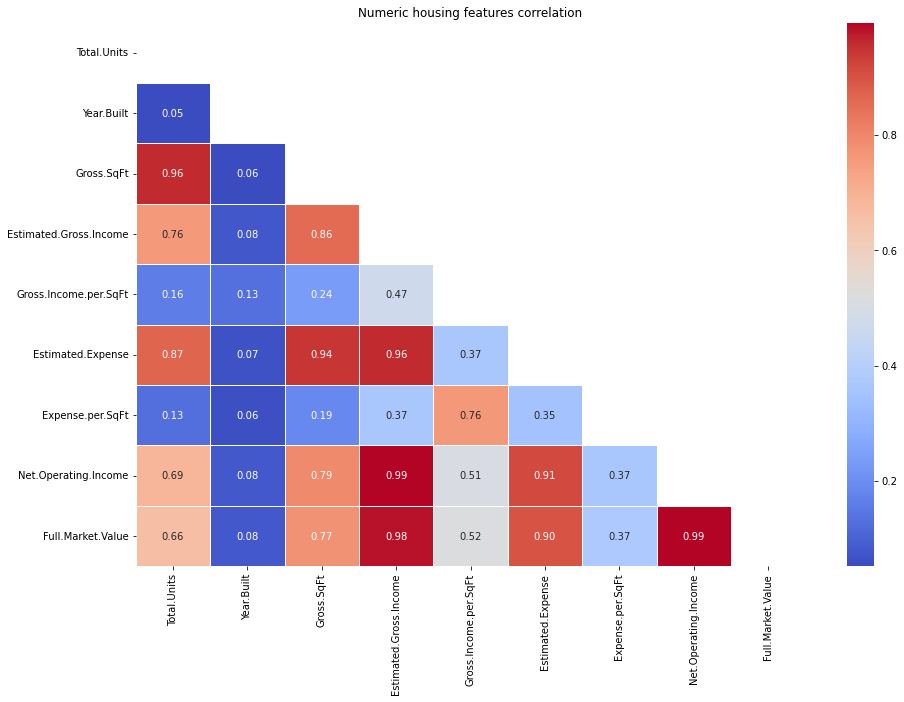

In [135]:
#find correlation beween numerical features
housing_num = features.drop(columns=categorical_cols, axis=1)
fig, ax = plt.subplots(figsize=(15, 10))
corr  = housing_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, ax=ax, mask=mask)
plt.title("Numeric housing features correlation")
plt.show()

In [136]:
#find the features have correlation higher than 90%
h_corr = []
def find_H_corr(col_features):
    for i in range(len(col_features)-1):
        for j in range(i+1,len(col_features)):
            if corr[col_features[i]][col_features[j]] >0.90:
                print(col_features[i],col_features[j],corr[col_features[i]][col_features[j]])
                h_corr.append(col_features[j])

In [137]:
columns = housing_num.columns.tolist()
find_H_corr(columns)

Total.Units Gross.SqFt 0.9577540127801634
Gross.SqFt Estimated.Expense 0.9433134914402447
Estimated.Gross.Income Estimated.Expense 0.9576950773269204
Estimated.Gross.Income Net.Operating.Income 0.9918869923293705
Estimated.Gross.Income Full.Market.Value 0.9829985122100484
Estimated.Expense Net.Operating.Income 0.9133412830910128
Net.Operating.Income Full.Market.Value 0.994099026619843


In [138]:
features = features.drop(columns=h_corr,axis=1)
features.head()

,Neighborhood,Building.Classification,Total.Units,Year.Built,Estimated.Gross.Income,Gross.Income.per.SqFt,Expense.per.SqFt,Boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,1332615,36.51,9.37,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,6633257,52.47,13.94,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,0.0,17310000,31.24,6.39,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,11776313,47.28,11.18,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,10004582,45.58,12.68,Manhattan


In [139]:
#remove missing data
features.isnull().sum()

Neighborhood               0
Building.Classification    0
Total.Units                0
Year.Built                 0
Estimated.Gross.Income     0
Gross.Income.per.SqFt      0
Expense.per.SqFt           0
Boro                       0
dtype: int64

In [140]:
features['Year.Built'].fillna(0,inplace = True)

In [141]:
def data_preparing(features):
    housing_dummies = pd.get_dummies(features)
    std_scall = StandardScaler()
    return std_scall.fit_transform(housing_dummies)

In [160]:
data_preparing['housing_dummies']

TypeError: 'function' object is not subscriptable

In [142]:
housing_prepared =  data_preparing(features)

In [143]:
#build tree regression model 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [144]:
#test tree regression
scores= cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [145]:
display_scores(tree_rmse_scores)

Scores: [ 3299410.86239013  2575123.40190872 10005959.28152558  6610749.70450714
  6494534.94450572  1196745.85967443   758133.78282122  1432074.72118698
  1346400.33920896  6246956.34773277]
Mean: 3996608.9245461645
Standard deviation: 2977982.933751578


### **Conclusion for reduce correlated features**
- accuray of the our best model is reduced
- because we use small amount of data we can't reduce the features

array([ 0.05785269,  0.24092757,  0.86137517,  2.35184285,  1.92883127,
       -0.09603996, -0.019518  , -0.10929799, -0.04785474, -0.055279  ,
       -0.05864343, -0.02760788, -0.16304376, -0.019518  , -0.0516989 ,
       -0.019518  , -0.08072116, -0.12437003, -0.03905833, -0.10749996,
       -0.02760788, -0.03381906, -0.06182742, -0.019518  , -0.02760788,
       -0.04367687, -0.06485754, -0.1862068 , -0.08978541, -0.019518  ,
       -0.09399978, -0.10929799, -0.07829603, -0.04785474, -0.06485754,
       -0.03381906, -0.03905833, -0.08072116, -0.07579529, -0.07321118,
       -0.03381906, -0.04367687, -0.019518  , -0.04785474, -0.03381906,
       -0.1       , -0.1462616 , -0.03905833, -0.07579529,  8.36498494,
       -0.0516989 , -0.019518  , -0.019518  , -0.05864343, -0.13204205,
       -0.019518  , -0.23097484, -0.055279  , -0.08072116, -0.07053456,
       -0.03905833, -0.03905833, -0.08072116, -0.02760788, -0.0853702 ,
       -0.019518  , -0.08760478, -0.15291402, -0.1489551 , -0.01

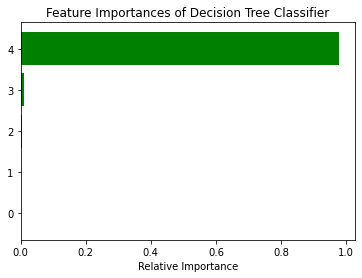

In [148]:
importances = tree_reg.feature_importances_
indices = np.argsort(importances)
features = np.array(numerical_cols)
plt.title('Feature Importances of Decision Tree Classifier')
count = 5 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [157]:
features = np.array(numerical_cols)

In [158]:
features

array(['Total.Units', 'Year.Built', 'Gross.SqFt',
       'Estimated.Gross.Income', 'Gross.Income.per.SqFt',
       'Estimated.Expense', 'Expense.per.SqFt', 'Net.Operating.Income',
       'Full.Market.Value'], dtype=object)